 3.  Import the required packages with their customary aliases as follows:
    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?


In [3]:
gdp_df.shape

(7662, 4)

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## ANSWER:
    7662 rows and 4 columns
    country or area = object 
    year = int64
    value = float64
    value footnotes = float64

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head()


,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

In [7]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


### ---------------------------------------------------------------------------------------------------

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [8]:
gdp_df.Year.value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [9]:
test = gdp_df.Country.value_counts().to_frame()
test

,count
Country,
Least developed countries: UN classification,33
Middle East & North Africa,33
Middle East & North Africa (IDA & IBRD),33
Middle income,33
Mongolia,33
...,...
Kosovo,15
Sint Maarten (Dutch part),14
Turks and Caicos Islands,12


In [10]:
test.value_counts()

count
33       202
28        10
32         5
23         4
31         3
22         3
29         2
26         2
10         2
12         1
25         1
20         1
19         1
16         1
30         1
15         1
14         1
24         1
Name: count, dtype: int64

In [11]:
test = test.reset_index()
test

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [12]:
test.value_counts()

Country                                 count
Afghanistan                             20       1
Romania                                 33       1
Namibia                                 33       1
Nauru                                   19       1
Nepal                                   33       1
                                                ..
Guyana                                  33       1
Haiti                                   33       1
Heavily indebted poor countries (HIPC)  33       1
High income                             33       1
Zimbabwe                                33       1
Name: count, Length: 242, dtype: int64

In [13]:
missing_countries = test.loc[test['count']< 33]
missing_countries

,Country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


### Answer
    202 countries with data for all years. 
    Hungary, Lebanon, Aruba, Tonga, Bhutan. countries with the most missed data
    90s were worst years gathering info 2010s were the best years

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [14]:
gdp_2020 = gdp_df.loc[gdp_df['Year']== 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

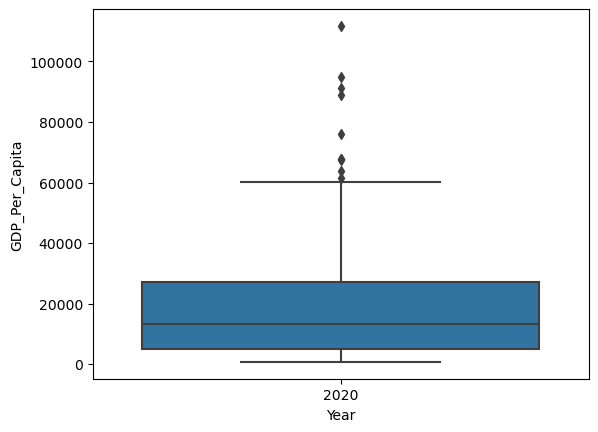

In [15]:
sns.boxplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

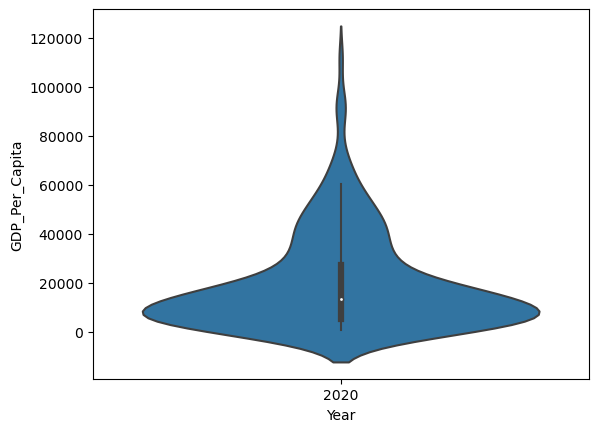

In [16]:
sns.violinplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

D:\internets\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

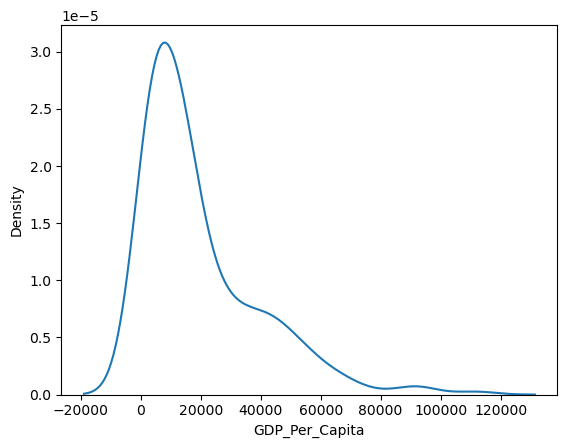

In [17]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

D:\internets\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


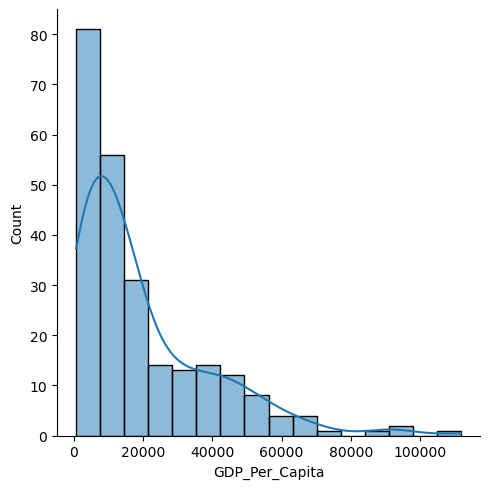

In [18]:
sns.displot(data =gdp_2020['GDP_Per_Capita'], kde=True)

### Answer
    most countries fall between 0 and 20000
    the histogram gives you the number of countries

### 9. What was the median GDP per capita value in 2020?

In [19]:
gdp_2020.GDP_Per_Capita.median()

13357.997573370474

In [20]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


### Answer
    13357.997573370474

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [21]:
my_list3 = [1990,2000,2010,2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(my_list3)]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [22]:
gdp_decades = gdp_decades.reset_index(drop = True)
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1968.341002
1,Afghanistan,2010,2026.163818
2,Africa Eastern and Southern,2020,3455.023119
3,Africa Eastern and Southern,2010,3513.315920
4,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
916,Zambia,1990,2290.039226
917,Zimbabwe,2020,1990.319419
918,Zimbabwe,2010,1799.540233
919,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

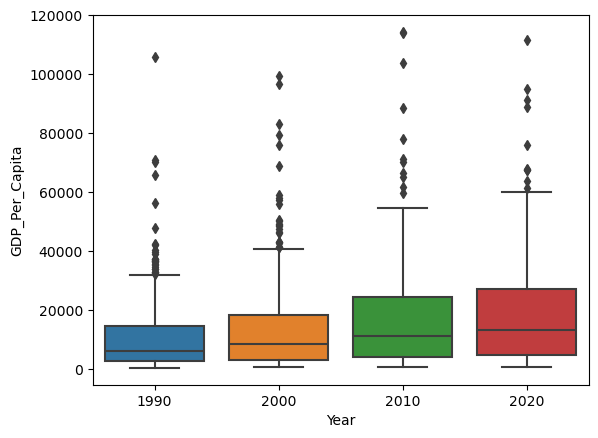

In [23]:
sns.boxplot( x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

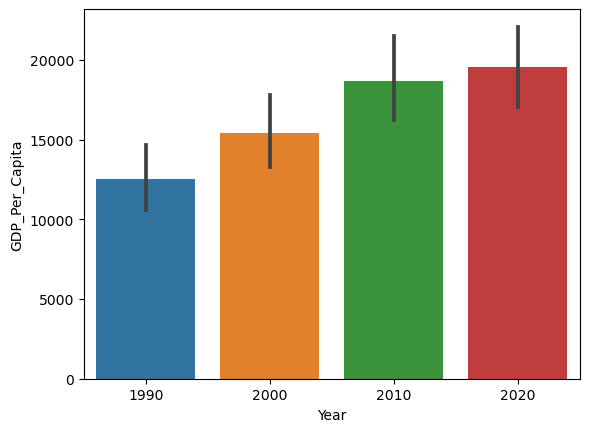

In [24]:
sns.barplot( x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

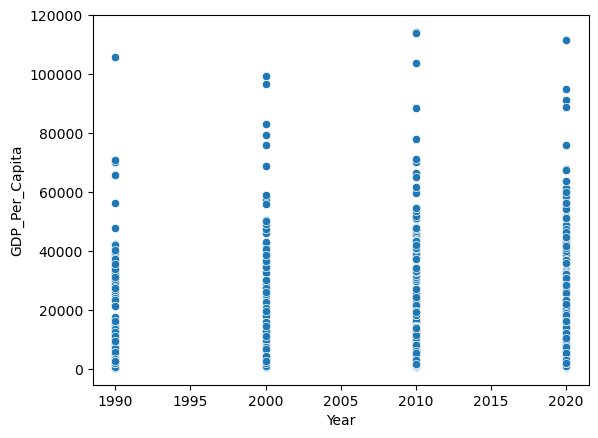

In [25]:
sns.scatterplot( x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

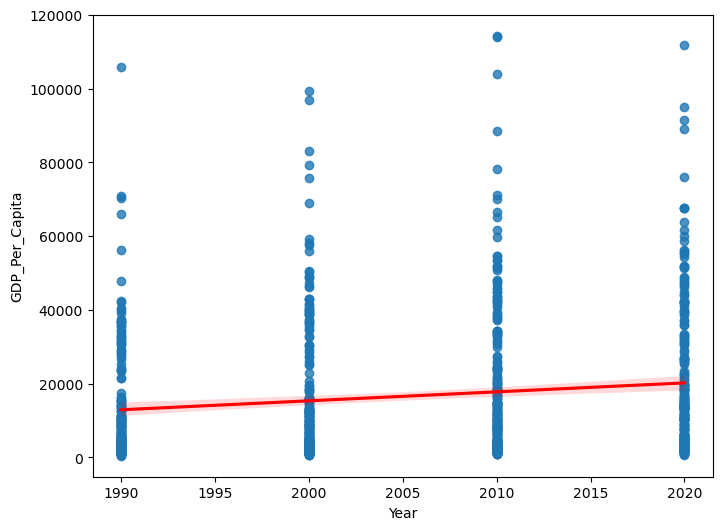

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades['Year'],
    y=gdp_decades['GDP_Per_Capita'],
    line_kws={"color": "r"},
    ax=ax)

### Answer:
    Over time the GDP per capita has steadily increased
   

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [27]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]

,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


### Answer:
    United Arab Emirates

### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [28]:
high_2020 = gdp_df[gdp_df.Year == 2020]
high_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [29]:
high_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [30]:
lux_gdp = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']
lux_gdp.head(2)

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708


<Axes: xlabel='Year'>

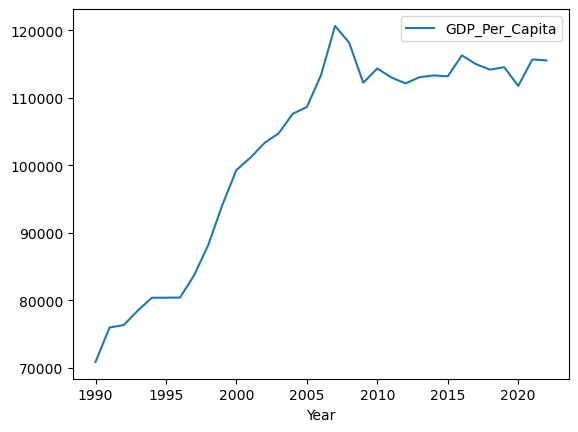

In [31]:
lux_gdp.plot(x = 'Year', y = 'GDP_Per_Capita')

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
    **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [32]:
bur_gdp = gdp_df.loc[gdp_df['Country'] == 'Burundi']
bur_gdp.head(2)

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712


<Axes: xlabel='Year'>

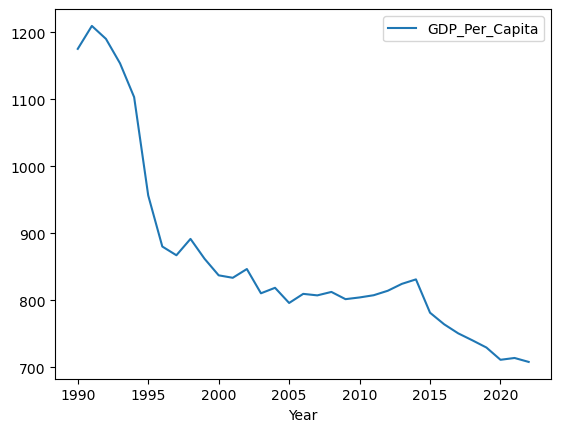

In [33]:
bur_gdp.plot(x = 'Year', y = 'GDP_Per_Capita')

### **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

### Answer:
    over time their GDP went down

### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [34]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [35]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [36]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [37]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [38]:
internet_df.columns = ['Country'
                      ,'Year'
                      ,'internet_users_pct']
internet_df

,Country,Year,internet_users_pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [39]:
internet_df.value_counts('internet_users_pct')

internet_users_pct
0.00000     280
7.00000      16
10.00000     15
3.00000      12
9.00000      12
           ... 
4.36189       1
4.35060       1
4.33228       1
4.32489       1
19.24230      1
Name: count, Length: 4935, dtype: int64

### Answer:
1990 had the most observations at 226 while 2023 had the least at 11

### 17. What is the first year to have a non-zero internet users percentage value?

In [40]:
test = internet_df.loc[internet_df.internet_users_pct != 0].sort_values(by ='Year',ascending = True)
test

,Country,Year,internet_users_pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


In [41]:
internet_df.loc[internet_df['Year'] == 2013].sort_values(by = 'internet_users_pct', ascending = True)

,Country,Year,internet_users_pct
1783,Eritrea,2013,0.90000
4074,Niger,2013,1.15000
874,Burundi,2013,1.26422
5056,Somalia,2013,1.50000
3860,Myanmar,2013,1.80000
...,...,...,...
5276,Sweden,2013,94.78360
4174,Norway,2013,95.05340
603,Bermuda,2013,95.30000
2593,Iceland,2013,96.54680


### Answer 
    1990 or 2013 depending on how the question actually is
   
   

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [42]:
mylist6 = (2000,2014)
test2 = internet_df.loc[internet_df.Year.isin(mylist6)]

<Axes: xlabel='Year', ylabel='internet_users_pct'>

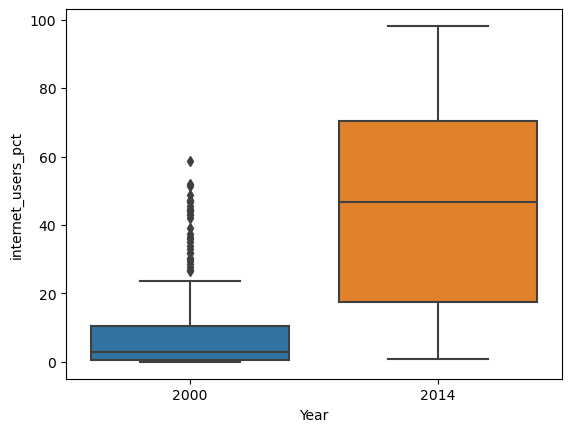

In [43]:
sns.boxplot( x=test2['Year'], y=test2['internet_users_pct'])

In [44]:
internet2014 = internet_df.loc[internet_df.Year == 2014]
internet2014

,Country,Year,internet_users_pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


In [45]:
internet2000 = internet_df.loc[internet_df.Year == 2000]
internet2000

,Country,Year,internet_users_pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5974,Virgin Islands (US),2000,13.815100
5994,Wallis and Futuna,2000,4.768070
6017,Yemen,2000,0.082500
6045,Zambia,2000,0.191072


<Axes: xlabel='Year', ylabel='internet_users_pct'>

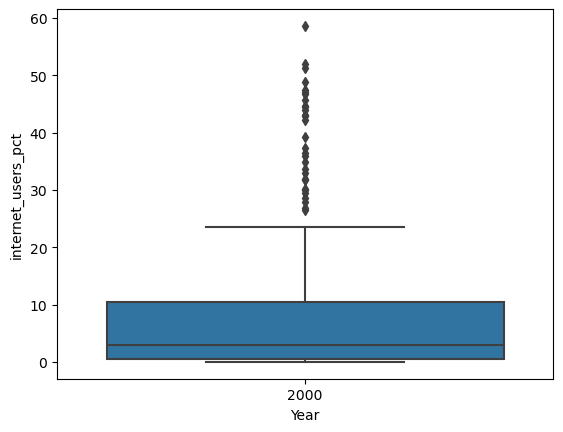

In [46]:
sns.boxplot( x=internet2000['Year'], y=internet2000['internet_users_pct'])

<Axes: xlabel='Year', ylabel='internet_users_pct'>

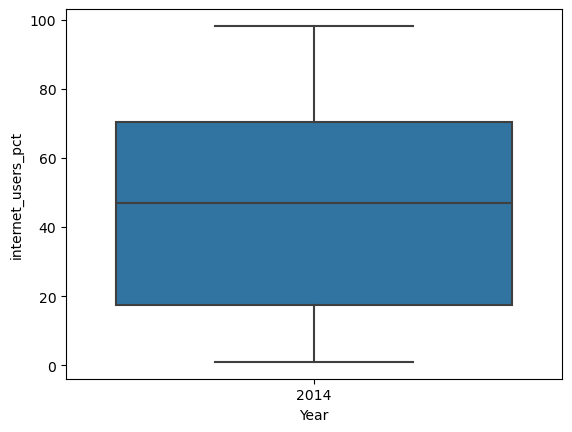

In [47]:
sns.boxplot( x=internet2014['Year'], y=internet2014['internet_users_pct'])

### Answer:
    2000 has more outlier and smaller internet users

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [48]:
internet_df.loc[internet_df.internet_users_pct < 5].loc[internet_df.Year == 2014]

,Country,Year,internet_users_pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [49]:
internet2014under5 = internet2014.loc[internet2014.internet_users_pct < 5]
internet2014under5

,Country,Year,internet_users_pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [50]:
internet2014under5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 873 to 5116
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             10 non-null     object 
 1   Year                10 non-null     int64  
 2   internet_users_pct  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


### Answer:
    10

### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [51]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df,
        left_on = ['Country','Year'], right_on = ['Country', 'Year'],
        how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,internet_users_pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,17.600000
3,Afghanistan,2018,2060.698973,16.800000
4,Afghanistan,2017,2096.093111,13.500000
...,...,...,...,...
9107,Yemen,1999,NaN,0.056629
9108,Yemen,1998,NaN,0.023323
9109,Yemen,1997,NaN,0.015025
9110,Yemen,1996,NaN,0.000621


In [52]:
gdp_and_internet_use.isnull().sum()

Country                  0
Year                     0
GDP_Per_Capita        1450
internet_users_pct    3029
dtype: int64

### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [53]:
gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014].sort_values(by = 'internet_users_pct', ascending = False)

,Country,Year,GDP_Per_Capita,internet_users_pct
2993,Iceland,2014,50450.741612,98.1580
8131,Falkland (Malvinas) Islands,2014,NaN,97.6000
687,Bermuda,2014,77361.104881,96.8000
5212,Norway,2014,62838.515727,96.3005
1669,Denmark,2014,52048.335493,95.9935
...,...,...,...,...
6949,The Gambia,2014,1885.142034,NaN
7167,Turks and Caicos Islands,2014,24661.145053,NaN
7377,Upper middle income,2014,14063.487284,NaN
7542,West Bank and Gaza,2014,5967.073437,NaN


### Iceland,Falkland(Malvinas) Islands, and Bermuda

In [54]:
mylist213 = ['Iceland','Falkland (Malvinas) Islands', 'Bermuda']
top3 = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(mylist213)]
top3

,Country,Year,GDP_Per_Capita,internet_users_pct
679,Bermuda,2022,81165.650944,NaN
680,Bermuda,2021,78570.489515,NaN
681,Bermuda,2020,76117.804744,NaN
682,Bermuda,2019,81681.726668,NaN
683,Bermuda,2018,81423.408453,NaN
...,...,...,...,...
8341,Iceland,1994,NaN,6.794810
8342,Iceland,1993,NaN,2.667830
8343,Iceland,1992,NaN,1.539160
8344,Iceland,1991,NaN,0.505129


In [55]:
top3.Country.value_counts()

Country
Bermuda                        33
Iceland                        33
Falkland (Malvinas) Islands    23
Name: count, dtype: int64

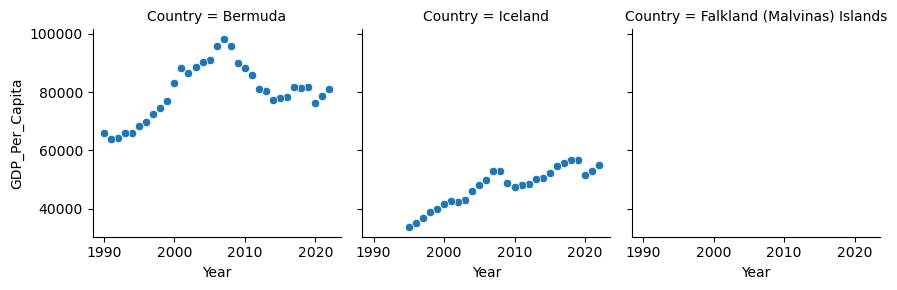

In [56]:
plot = sns.FacetGrid(top3, col= 'Country')
plot.map_dataframe(sns.scatterplot, x = 'Year', y='GDP_Per_Capita')

### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [57]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,internet_users_pct
7,Afghanistan,2014,2144.449634,7.0000
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,54.3000
127,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8954,Syrian Arab Republic,2014,NaN,28.0900
8991,Türkiye,2014,NaN,51.0374
9022,Venezuela,2014,NaN,57.0000
9049,Virgin Islands (US),2014,NaN,50.0700


In [58]:
gdp_and_internet_use_2014.isnull().sum()

Country                0
Year                   0
GDP_Per_Capita        42
internet_users_pct    80
dtype: int64

### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='internet_users_pct', ylabel='GDP_Per_Capita'>

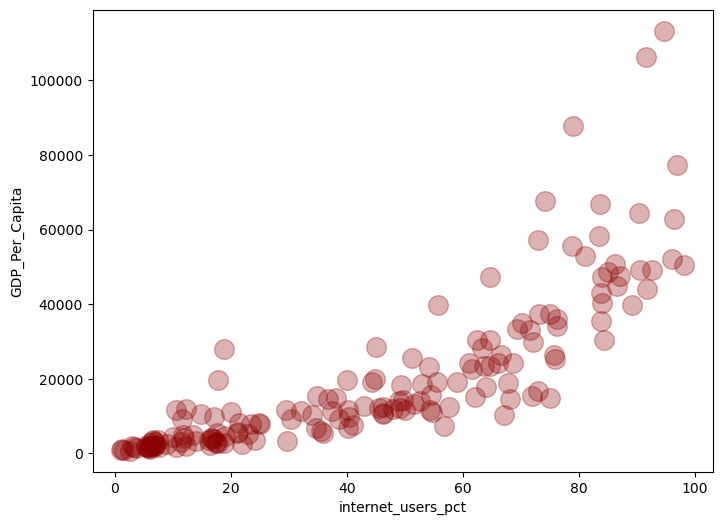

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_and_internet_use_2014['internet_users_pct'],
    y=gdp_and_internet_use_2014['GDP_Per_Capita'],
    fit_reg=False,
    scatter_kws={
        "color":"darkred",
        "alpha":0.3,
        "s":200
    },
    ax=ax
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


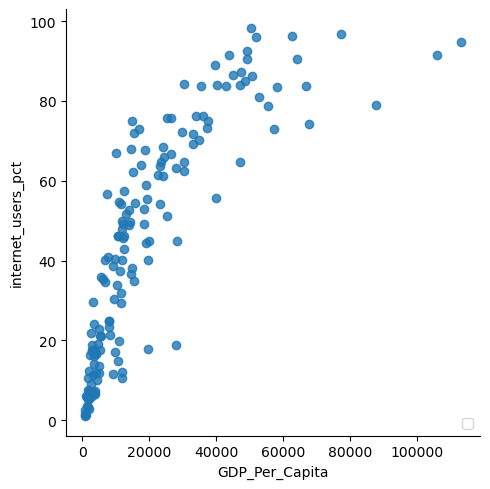

In [60]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='GDP_Per_Capita', y='internet_users_pct', data=gdp_and_internet_use_2014, fit_reg=False, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

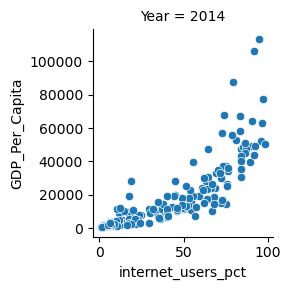

In [61]:
plot = sns.FacetGrid(gdp_and_internet_use_2014, col= 'Year')
plot.map_dataframe(sns.scatterplot, x = 'internet_users_pct', y='GDP_Per_Capita')

### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [62]:
gdp_and_internet_use_2014['gdp_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels = ['low','medium','high'])
                                                   

C:\Users\edwar\AppData\Local\Temp\ipykernel_25108\3722396862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['gdp_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3, labels = ['low','medium','high'])


In [63]:
gdp_and_internet_use_2014


,Country,Year,GDP_Per_Capita,internet_users_pct,gdp_group
7,Afghanistan,2014,2144.449634,7.0000,low
28,Africa Eastern and Southern,2014,3642.875373,NaN,low
61,Africa Western and Central,2014,4146.994622,NaN,low
94,Albania,2014,11586.817446,54.3000,medium
127,Algeria,2014,11561.259795,29.5000,medium
...,...,...,...,...,...
8954,Syrian Arab Republic,2014,NaN,28.0900,NaN
8991,Türkiye,2014,NaN,51.0374,NaN
9022,Venezuela,2014,NaN,57.0000,NaN
9049,Virgin Islands (US),2014,NaN,50.0700,NaN


### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

D:\internets\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='gdp_group', ylabel='internet_users_pct'>

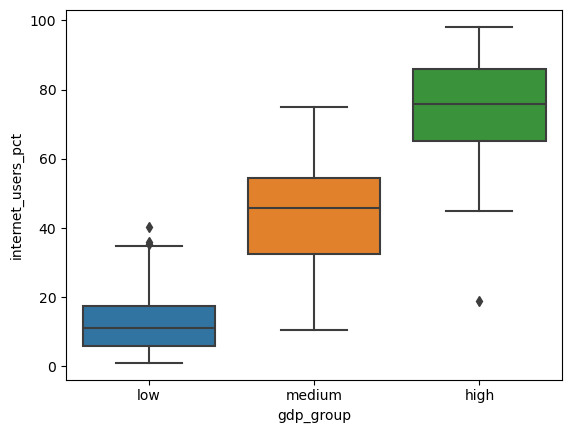

In [67]:
sns.boxplot(y=gdp_and_internet_use_2014['internet_users_pct'],x=gdp_and_internet_use_2014['gdp_group'])